In [ ]:
# Homework 7 - Arc Length and Parametrization with Constant Speed
# Sarocha Sitthi

Question 1: Arc length L = 2.495247
Question 2: t_ for s = 0.4 is approximately t_ = 0.350239

Question 3: Values of t_ for different s values:
  s       t_
0.1 0.124063
0.2 0.204047
0.3 0.276524
0.4 0.350239
0.5 0.432522
0.6 0.525089
0.7 0.602218
0.8 0.657022
0.9 0.699023
1.0 0.733502
1.1 0.763061
1.2 0.789135
1.3 0.812596
1.4 0.834013
1.5 0.853784
1.6 0.872192
1.7 0.889454
1.8 0.905733
1.9 0.921161
2.0 0.935840
2.1 0.949857
2.2 0.963283
2.3 0.976176
2.4 0.988587


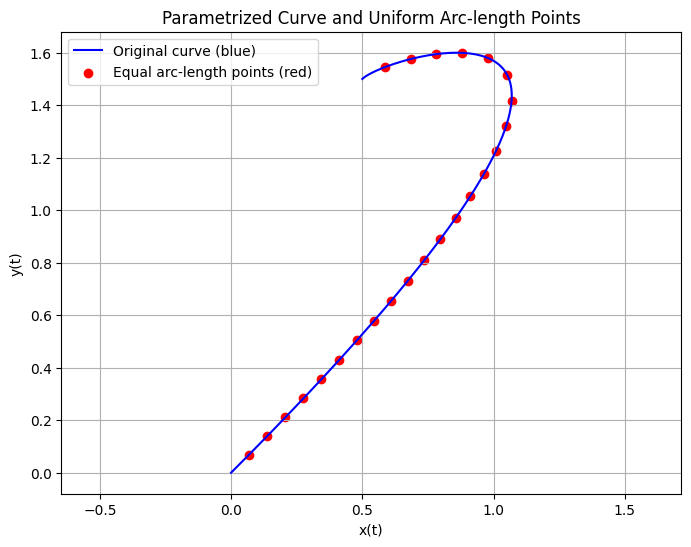

In [2]:
import numpy as np
from scipy.integrate import quad
from scipy.optimize import root_scalar
import pandas as pd
import matplotlib.pyplot as plt

# Define x(t) and y(t)
x = lambda t: 0.5 + 0.3 * t + 3.9 * t**2 - 4.7 * t**3
y = lambda t: 1.5 + 0.3 * t + 0.9 * t**2 - 2.7 * t**3

# Derivatives x'(t) and y'(t)
dx = lambda t: 0.3 + 2 * 3.9 * t - 3 * 4.7 * t**2
dy = lambda t: 0.3 + 2 * 0.9 * t - 3 * 2.7 * t**2

# Function f(t) = sqrt(x'(t)^2 + y'(t)^2)
f = lambda t: np.sqrt(dx(t)**2 + dy(t)**2)

# Question 1: Compute the arc length L from t = 0 to t = 1
L, _ = quad(f, 0, 1)
print(f"Question 1: Arc length L = {L:.6f}")

# Question 2: Find t_ such that arc length from 0 to t_ is 0.4
def arc_length_to_t(t_, s_target):
    integral, _ = quad(f, 0, t_)
    return integral - s_target

sol_q2 = root_scalar(arc_length_to_t, args=(0.4,), bracket=[0, 1], method='brentq')
t_sol_q2 = sol_q2.root
print(f"Question 2: t_ for s = 0.4 is approximately t_ = {t_sol_q2:.6f}")

# Question 3: Repeat Q2 for s = 0.1 to 2.4 in steps of 0.1
s_values = np.arange(0.1, 2.5, 0.1)
t_values = []

for s in s_values:
    sol = root_scalar(arc_length_to_t, args=(s,), bracket=[0, 1], method='brentq')
    t_values.append(sol.root)

# Display results in table format
df = pd.DataFrame({'s': s_values, 't_': t_values})
print("\nQuestion 3: Values of t_ for different s values:")
print(df.to_string(index=False))

# Optional: Plot x(t), y(t) with markers for each computed t_
ttt = np.linspace(0, 1, 1000)
xt = x(ttt)
yt = y(ttt)

plt.figure(figsize=(8, 6))
plt.plot(xt, yt, label="Original curve (blue)", color='blue')
plt.scatter(x(np.array(t_values)), y(np.array(t_values)), color='red', label="Equal arc-length points (red)")
plt.title("Parametrized Curve and Uniform Arc-length Points")
plt.xlabel("x(t)")
plt.ylabel("y(t)")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()



Question 4: Newton’s Method iterations with forward error (s = 0.4)
Iteration 1: t = 0.3379016508723530, forward error = 1.23e-02
Iteration 2: t = 0.3501386733041840, forward error = 1.01e-04
Iteration 3: t = 0.3502393009712588, forward error = 7.32e-09
Iteration 4: t = 0.3502393082934499, forward error = 1.11e-16


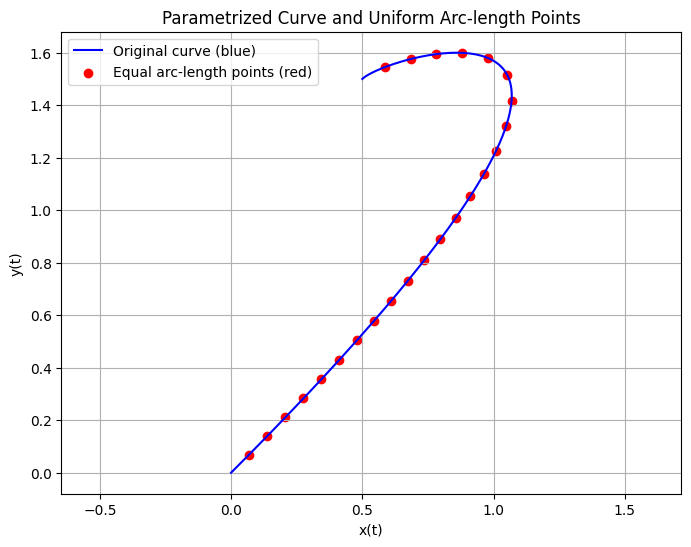

In [3]:
# Question 4: Newton’s method for s = 0.4 and display forward error at each iteration
print("\nQuestion 4: Newton’s Method iterations with forward error (s = 0.4)")
t_exact = t_sol_q2
s_target = 0.4
tol = 1e-14
max_iter = 10
t_newton = 0.5
errors = []

for i in range(max_iter):
    F = arc_length_to_t(t_newton, s_target)
    F_prime = f(t_newton)
    t_new = t_newton - F / F_prime
    error = abs(t_new - t_exact)
    errors.append(error)
    print(f"Iteration {i+1}: t = {t_new:.16f}, forward error = {error:.2e}")

    if error < tol:
        break
    t_newton = t_new

ttt = np.linspace(0, 1, 1000)
xt = x(ttt)
yt = y(ttt)

plt.figure(figsize=(8, 6))
plt.plot(xt, yt, label="Original curve (blue)", color='blue')
plt.scatter(x(np.array(t_values)), y(np.array(t_values)), color='red', label="Equal arc-length points (red)")
plt.title("Parametrized Curve and Uniform Arc-length Points")
plt.xlabel("x(t)")
plt.ylabel("y(t)")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

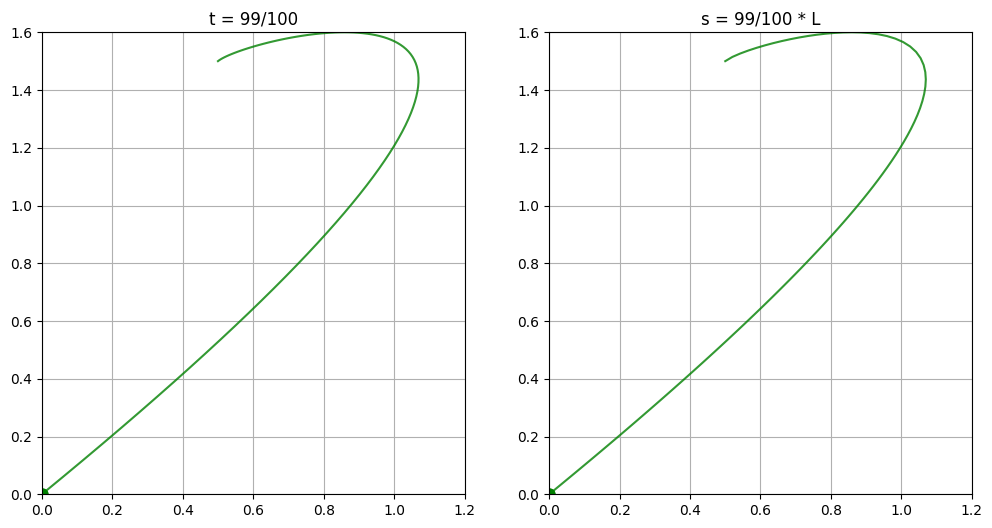

In [11]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Generate 100 uniformly spaced t values
t_uniform = np.linspace(0, 1, 100)
x_t = x(t_uniform)
y_t = y(t_uniform)

# Generate 100 equally spaced arc-length values
s_uniform = np.linspace(0, L, 100)
t_from_s = [root_scalar(arc_length_to_t, args=(s,), bracket=[0, 1], method='brentq').root for s in s_uniform]
x_s = x(np.array(t_from_s))
y_s = y(np.array(t_from_s))

# Set up figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Configure axes
for ax in [ax1, ax2]:
    ax.set_xlim(0, 1.2)
    ax.set_ylim(0, 1.6)
    ax.grid(True)

# Plot moving dots and trails
dot1, = ax1.plot([], [], 'go', markersize=8, label='Uniform t')
trail1, = ax1.plot([], [], 'g-', linewidth=1.5, alpha=0.8)

dot2, = ax2.plot([], [], 'go', markersize=8, label='Uniform s')
trail2, = ax2.plot([], [], 'g-', linewidth=1.5, alpha=0.8)

ax1.set_title("t = 0/100")
ax2.set_title("s = 0/100 * L")

def init():
    dot1.set_data([], [])
    trail1.set_data([], [])
    dot2.set_data([], [])
    trail2.set_data([], [])
    return dot1, trail1, dot2, trail2

def update(frame):
    # Update dot positions
    dot1.set_data([x_t[frame]], [y_t[frame]])
    dot2.set_data([x_s[frame]], [y_s[frame]])

    # Update trails (from 0 to current frame)
    trail1.set_data(x_t[:frame+1], y_t[:frame+1])
    trail2.set_data(x_s[:frame+1], y_s[:frame+1])

    # Update titles
    ax1.set_title(f"t = {frame}/100")
    ax2.set_title(f"s = {frame}/100 * L")

    return dot1, trail1, dot2, trail2

ani = FuncAnimation(fig, update, frames=100, init_func=init, blit=True, interval=120, repeat=True)
HTML(ani.to_jshtml())
